In [29]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict

In [30]:
#define state
class BMIState(TypedDict):
    height_m: float
    weight_kg: float
    bmi: float

In [31]:
#define bmi calculation function
def calculate_bmi(state: BMIState) -> BMIState:
    height  = state['height_m']
    weight = state['weight_kg']
    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)
    return state


In [32]:
#define graph
graph = StateGraph(BMIState)

#add nodes to the graph
#first parameter is the node name, second parameter is the function name
graph.add_node('bmi_calculate', calculate_bmi)

#add edges to the graph
graph.add_edge(START, 'bmi_calculate')
graph.add_edge('bmi_calculate', END)

#compile the graph
workflow = graph.compile()

In [47]:
initial_state = BMIState({
    'height_m' : 1.75,
    'weight_kg' : 50.0
})

#execute the workflow
final_state = workflow.invoke(initial_state)
print(final_state)

{'height_m': 1.75, 'weight_kg': 50.0, 'bmi': 16.33}


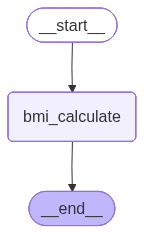

In [48]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

